In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class KMovingMeans:

    def __init__(self, k, init_value = 0):
        self._k = k
        self._data = [init_value] * k
        self._current_idx = 0
        self._mean = init_value

    def add(self, data):
        self._mean += (data - self._data[self._current_idx]) / self._k
        self._data[self._current_idx] = data
        self._current_idx = (self._current_idx + 1) % self._k

    @property
    def mean(self):
        return self._mean

class DoubleExponentialSmoothing:

    def __init__(self, level_decay, trend_decay, init_level = 0, init_trend = 0):
        self._level_decay = level_decay
        self._trend_decay = trend_decay
        self._level = init_level
        self._trend = init_trend
        self._target = init_level + init_trend

    def add(self, data):
        new_level = self._level_decay * data + (1 - self._level_decay) * self._target
        new_trend = self._trend_decay * (new_level - self._level) + (1 - self._trend_decay) * self._trend
        self._target = new_level + new_trend
        self._level = new_level
        self._trend = new_trend

    @property
    def level(self):
        return self._level

    @property
    def trend(self):
        return self._trend

    @property
    def target(self):
        return self._target
        

## Random3SAT Initial Experiments

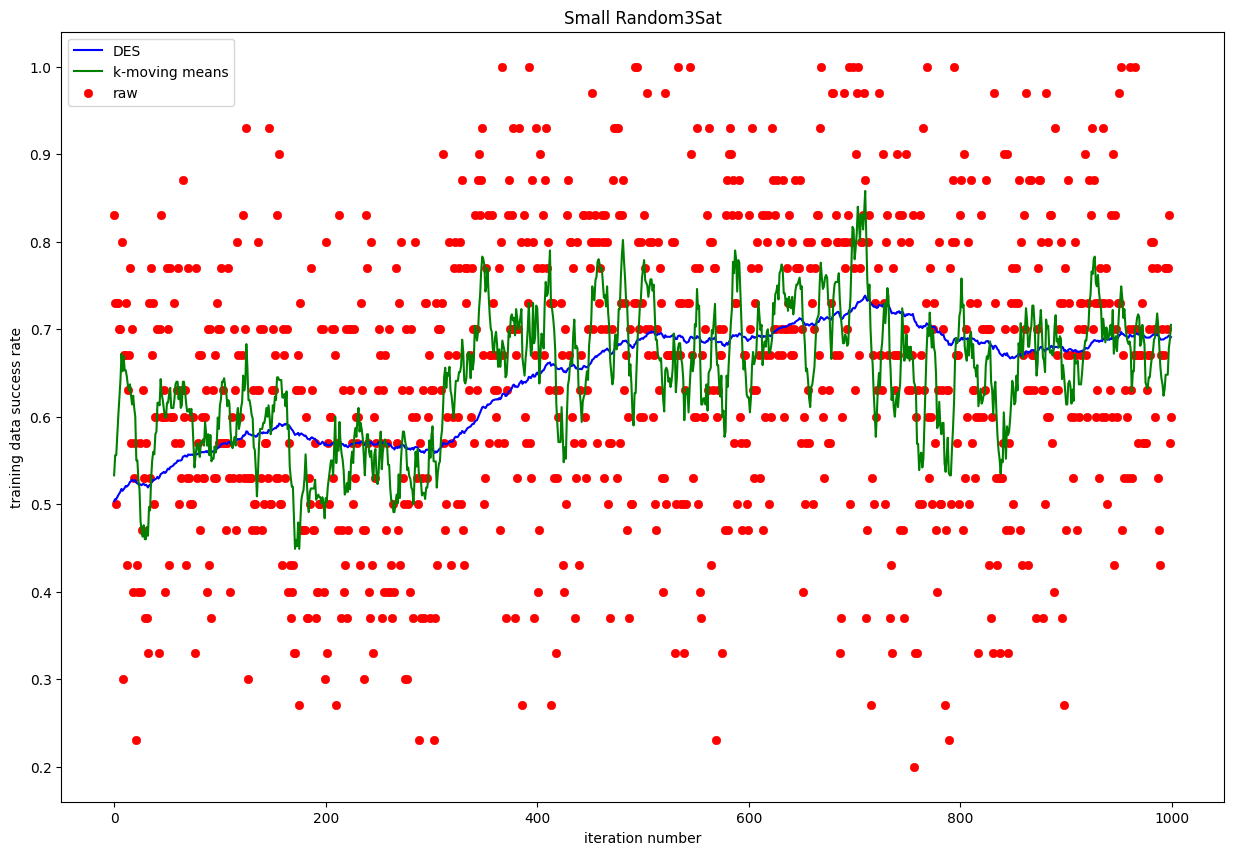

In [9]:
training_log = 'random3sat_small1.txt'

with open(training_log) as f:
    content = f.readlines()

success_rates = list(map(lambda s: float(s[-5:-1]), content[::2]))

means = []
levels = []
target_values = []

k_means = KMovingMeans(10, 0.5)
des = DoubleExponentialSmoothing(0.01, 0.001, 0.5, 0.0001)
for r in success_rates:
    des.add(r)
    levels.append(des.level)
    target_values.append(des.target)
    
    k_means.add(r)
    means.append(k_means.mean)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(levels, color='b', label='DES')
ax.plot(means, color='g', label='k-moving means')
ax.scatter(range(len(success_rates)), success_rates, color='r', linewidths=0.5, label='raw')

plt.title('Small Random3Sat')
plt.xlabel('iteration number')
plt.ylabel('training data success rate')
ax.legend()

plt.show()

## Random3SAT Analysis

In [9]:
small_log = 'random3sat-small.txt'
medium_log = 'random3sat-medium.txt'

small_val_scores_raw = []
small_val_scores_processed = []

medium_val_scores_raw = []
medium_val_scores_processed = []

with open(small_log) as f:
    content = f.readlines()
    for line in filter(lambda l: 'VAL_COMPUTATION' in l, content):
        raw, processed = line.split()[-2:]
        small_val_scores_raw.append(float(raw[-3:]))
        small_val_scores_processed.append(float(processed[-3:]))

with open(medium_log) as f:
    content = f.readlines()
    for line in filter(lambda l: 'VAL_COMPUTATION' in l, content):
        raw, processed = line.split()[-2:]
        medium_val_scores_raw.append(float(raw[-3:]))
        medium_val_scores_processed.append(float(processed[-3:]))

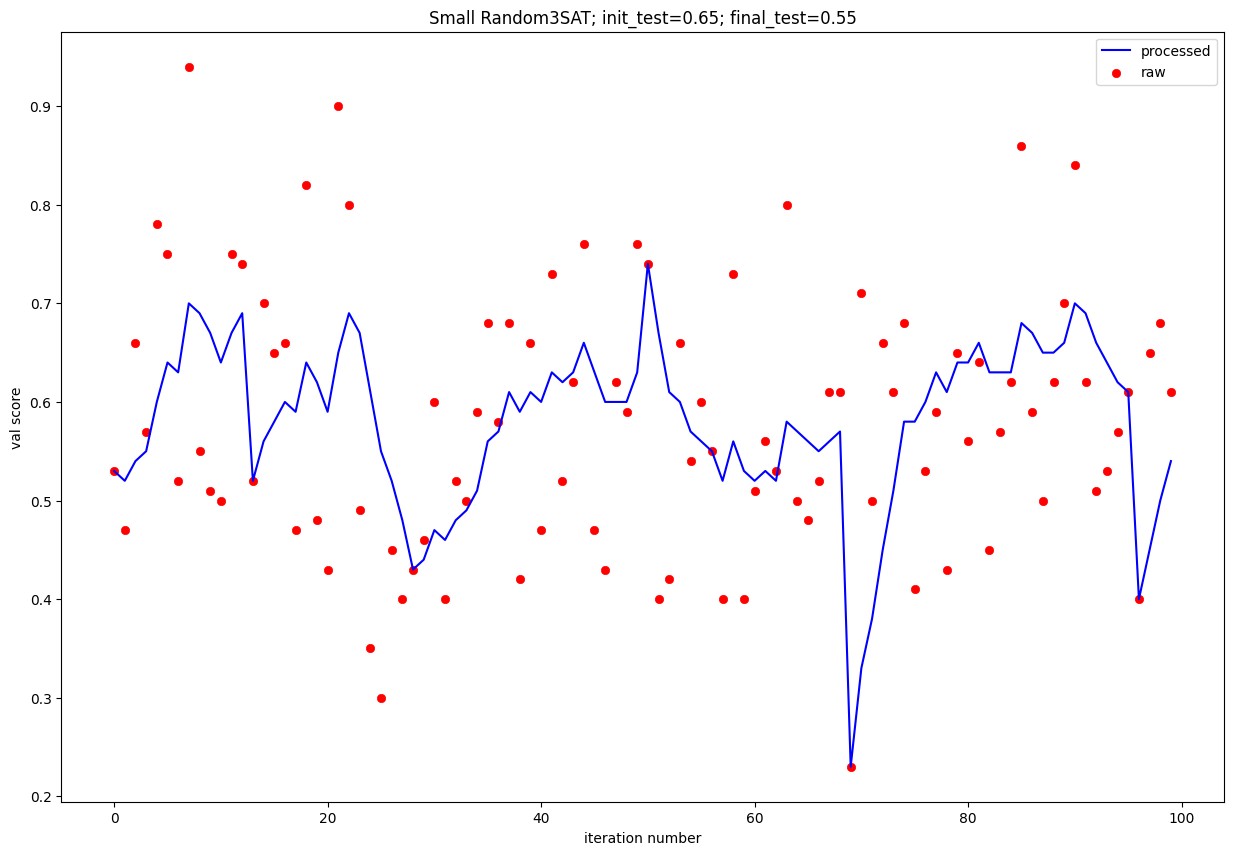

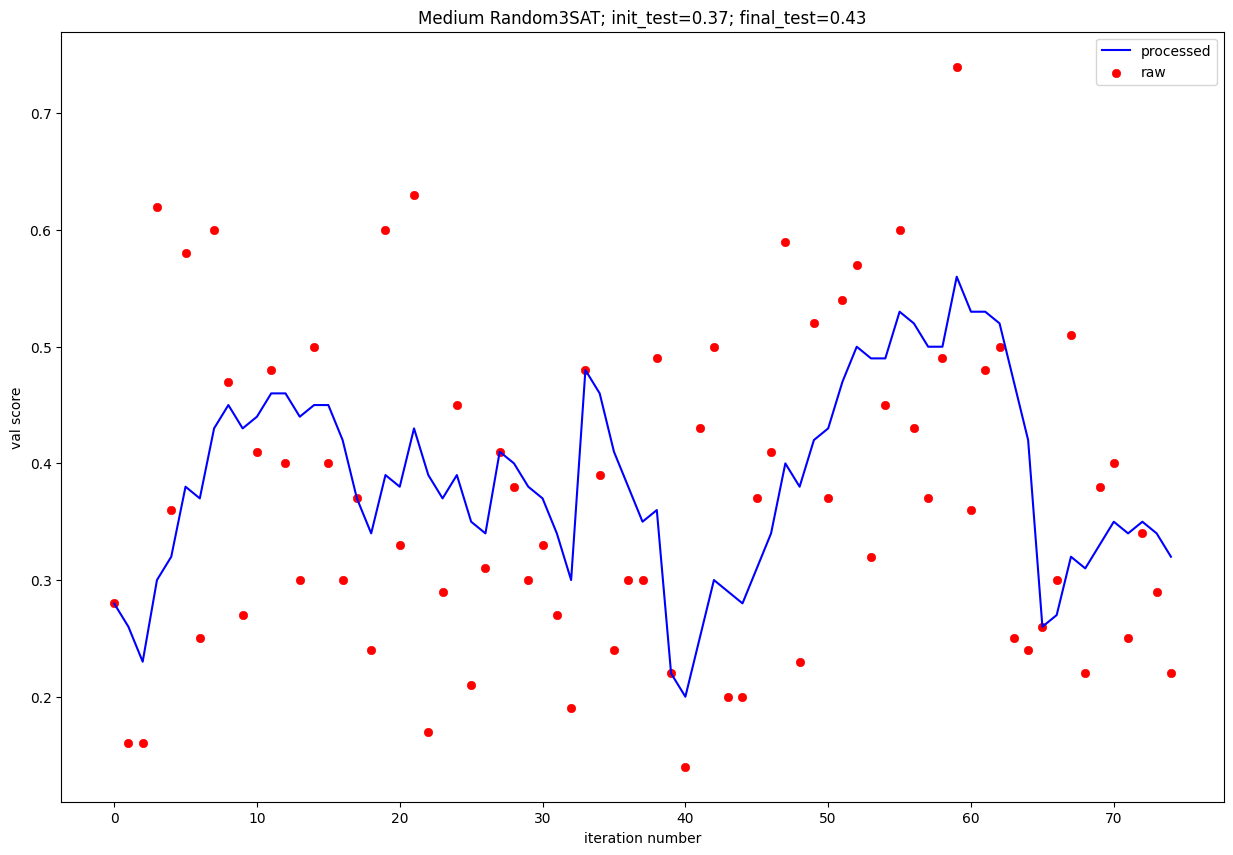

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(small_val_scores_processed, color='b', label='processed')
ax.scatter(range(len(small_val_scores_raw)), small_val_scores_raw, color='r', linewidths=0.5, label='raw')

plt.title('Small Random3SAT; init_test=0.65; final_test=0.55')
plt.xlabel('iteration number')
plt.ylabel('val score')
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(medium_val_scores_processed, color='b', label='processed')
ax.scatter(range(len(medium_val_scores_raw)), medium_val_scores_raw, color='r', linewidths=0.5, label='raw')

plt.title('Medium Random3SAT; init_test=0.37; final_test=0.43')
plt.xlabel('iteration number')
plt.ylabel('val score')
ax.legend()

plt.show()

## K-Clique

In [11]:
small_log = 'k-clique-small2.txt'
medium_log = 'k-clique-medium2.txt'

small_val_scores_raw = []
small_val_scores_processed = []

medium_val_scores_raw = []
medium_val_scores_processed = []

with open(small_log) as f:
    content = f.readlines()
    for line in filter(lambda l: 'VAL_COMPUTATION' in l, content):
        raw, processed = line.split()[-2:]
        small_val_scores_raw.append(float(raw[-3:]))
        small_val_scores_processed.append(float(processed[-3:]))

with open(medium_log) as f:
    content = f.readlines()
    for line in filter(lambda l: 'VAL_COMPUTATION' in l, content):
        raw, processed = line.split()[-2:]
        medium_val_scores_raw.append(float(raw[-3:]))
        medium_val_scores_processed.append(float(processed[-3:]))

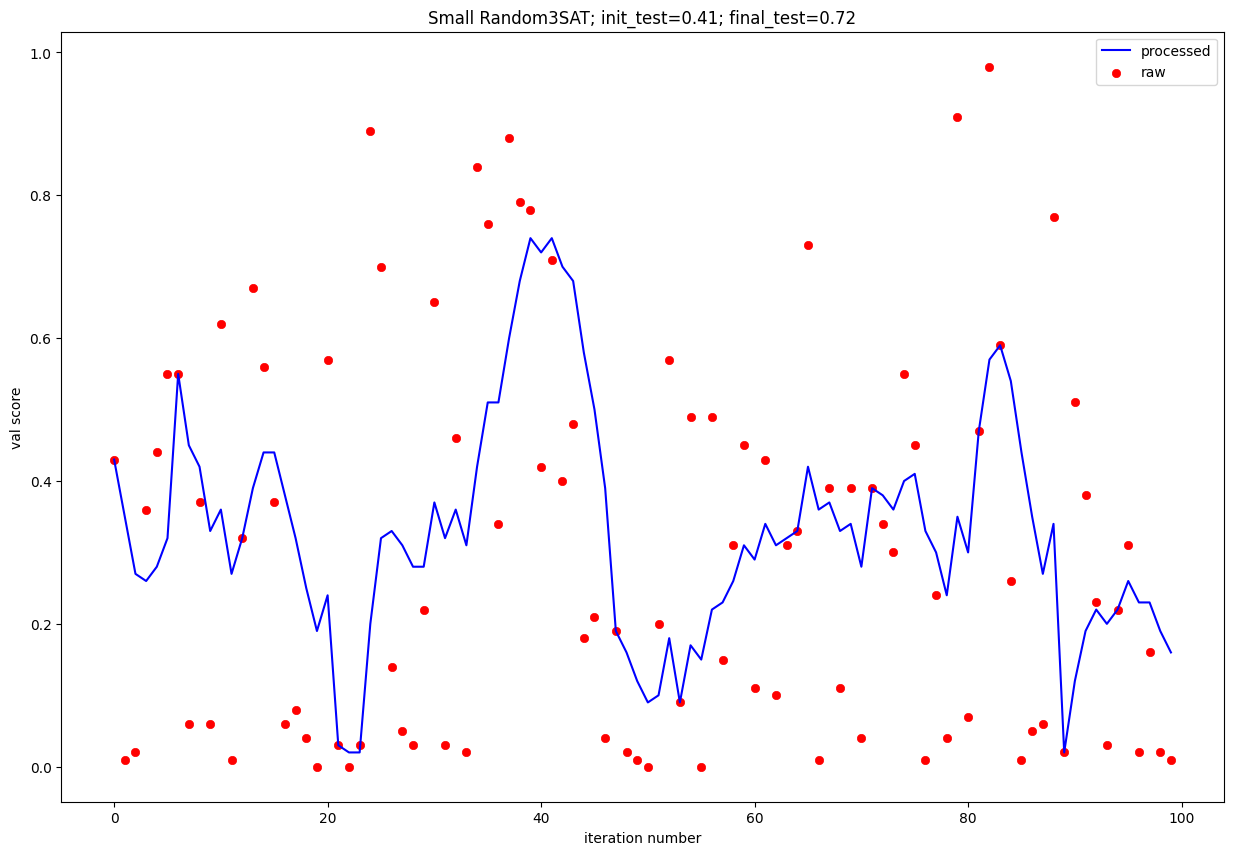

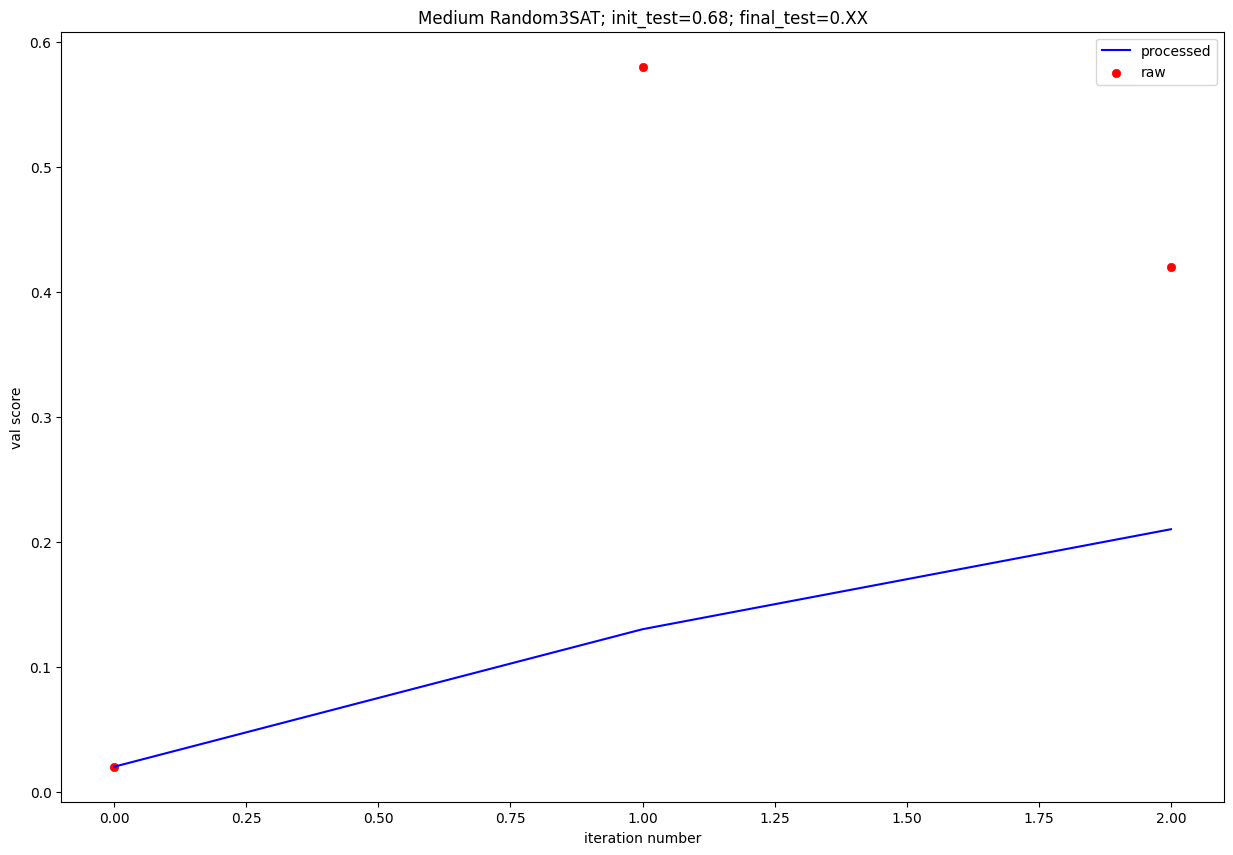

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(small_val_scores_processed, color='b', label='processed')
ax.scatter(range(len(small_val_scores_raw)), small_val_scores_raw, color='r', linewidths=0.5, label='raw')

plt.title('Small Random3SAT; init_test=0.41; final_test=0.72')
plt.xlabel('iteration number')
plt.ylabel('val score')
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(medium_val_scores_processed, color='b', label='processed')
ax.scatter(range(len(medium_val_scores_raw)), medium_val_scores_raw, color='r', linewidths=0.5, label='raw')

plt.title('Medium Random3SAT; init_test=0.68; final_test=0.XX')
plt.xlabel('iteration number')
plt.ylabel('val score')
ax.legend()

plt.show()